# 生成式模型

使用西瓜数据集4.0举例

<div><img src="./img/0901.png", width=900>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
data=pd.read_csv('data_watermelon/watermelon_4.csv')
data

,a,b
0,0.697,0.460
1,0.774,0.376
2,0.634,0.264
3,0.608,0.318
4,0.556,0.215
5,0.403,0.237
6,0.481,0.149
7,0.437,0.211
8,0.666,0.091
9,0.243,0.267


In [3]:
len(data)

30

假设 

x4 x25 标签为1

x12 x20 标签为2

x14 x17 标签为3

In [9]:
# 生成label
Y = np.full(len(data), -1)
Y[3] = 1
Y[24] = 1
Y[11] = 2
Y[19] = 2
Y[13] = 3
Y[16] = 3
Y

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  2, -1,  3, -1, -1,  3,
       -1, -1,  2, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1])

查看数据分布

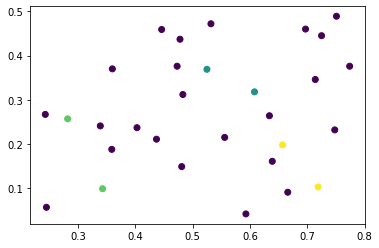

In [15]:
X = data.values
plt.scatter(X[:,0],X[:,1],c=Y)

In [17]:
# 数据信息
n_samples=data.shape[0]
n_samples

30

In [18]:
n_features = data.shape[1]
n_features

2

In [19]:
# 设置超参数
n_clusters = 3

In [20]:
# 初始化设置
import numpy as np
alpha = np.ones(n_clusters)/n_clusters
alpha

array([0.33333333, 0.33333333, 0.33333333])

In [21]:
mu = np.array([[.403,.237],[.714,.346],[.532,.472]])
mu

array([[0.403, 0.237],
       [0.714, 0.346],
       [0.532, 0.472]])

In [22]:
sigma = np.full((n_clusters,n_features,n_features),np.diag(np.full(n_features,0.1)))
sigma

array([[[0.1, 0. ],
        [0. , 0.1]],

       [[0.1, 0. ],
        [0. , 0.1]],

       [[0.1, 0. ],
        [0. , 0.1]]])

## 多元高斯分布

<div><img src="./img/0906.png", width=700>

计算数组的行列式

In [23]:
np.linalg.det(sigma[0])

0.010000000000000004

行列式的结果开根号

In [24]:
pow(np.linalg.det(sigma[0]),0.5)

0.10000000000000002

In [25]:
X = data.values
X.shape

(30, 2)

In [26]:
X[0]

array([0.697, 0.46 ])

In [27]:
(X[0] - mu[0]).T

array([0.294, 0.223])

In [28]:
# 计算一个多元高斯分布
# 其中x mu 1*2 ，sigma 2*2
def multiGaussian(x,mu,sigma):
    a = 1/((2*np.pi)*pow(np.linalg.det(sigma),0.5))
    print(a)
    b = np.exp(-0.5*(x-mu).dot(np.linalg.pinv(sigma)).dot((x-mu).T))
    print(b)
    return a*b

multiGaussian(X[0], mu[0], sigma[0])

1.591549430918953
0.5061992057075806


0.805641057775526

## 高斯混合

<div><img src="./img/0907.png", width=700>

In [29]:
gamma=np.zeros((n_samples,n_clusters))

In [30]:
p=np.zeros(n_clusters)
p

array([0., 0., 0.])

In [31]:
g=np.zeros(n_clusters)
g

array([0., 0., 0.])

In [32]:
# 计算x_0的高斯混合
## u_0时
p[0]=multiGaussian(X[0],mu[0],sigma[0])
p[0]

1.591549430918953
0.5061992057075806


0.805641057775526

In [33]:
g[0]=alpha[0]*p[0]
g[0]

0.26854701925850866

In [35]:
# 计算所有x在所有cluster上的高斯混合
def computeGamma(X,mu,sigma,alpha,multiGaussian):
    n_samples = X.shape[0] # 30个样本
    n_clusters = len(alpha) # 3个聚类
    gamma=np.zeros((n_samples,n_clusters)) # 存最后的结果，每个x对应着三个gamma
    p=np.zeros(n_clusters) # 多元高斯概率 一个x对应三个
    g=np.zeros(n_clusters) # a*多元高斯概率 一个x对应三个
    for i in range(n_samples): # 每个x
        # 对于一个x
        for j in range(n_clusters):
            
            p[j]=multiGaussian(X[i],mu[j],sigma[j])
            g[j]=alpha[j]*p[j]
        for k in range(n_clusters):
            # 每一个x，每一个聚类，算一个gamma
            gamma[i,k]=g[k]/np.sum(g)
            # 每个x算出三个
    return gamma, p, g
gamma = computeGamma(X,mu,sigma,alpha,multiGaussian)
gamma.shape

1.591549430918953
0.5061992057075806
1.591549430918953
0.9357330932066377
1.591549430918953
0.8721053919922435
1.591549430918953
0.45620637276246057
1.591549430918953
0.9777512371933363
1.591549430918953
0.7125537008966317
1.591549430918953
0.7630360508449829
1.591549430918953
0.9364866616172601
1.591549430918953
0.7646477566639486
1.591549430918953
0.7843264146990305
1.591549430918953
0.941670361839556
1.591549430918953
0.8628969535092075
1.591549430918953
0.8873950661028409
1.591549430918953
0.8100777891007138
1.591549430918953
0.7166806034809633
1.591549430918953
1.0
1.591549430918953
0.5809968173663782
1.591549430918953
0.6981439258379284
1.591549430918953
0.9331960234891656
1.591549430918953
0.6278273943834023
1.591549430918953
0.585874310272774
1.591549430918953
0.9908818249969203
1.591549430918953
0.6220281064781281
1.591549430918953
0.6799540885021207
1.591549430918953
0.6360837766655492
1.591549430918953
0.71416232253139
1.591549430918953
0.44238045908119933
1.591549430918953


AttributeError: 'tuple' object has no attribute 'shape'

In [59]:
p_label = []
for i in Y:
    if i == -1:
        p_label.append([1,1,1])
    elif i == 1:
        p_label.append([1,0,0])
    elif i == 2:
        p_label.append([0,1,0])
    elif i == 3:
        p_label.append([0,0,1])
p_label = np.array(p_label)
p_label

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [58]:
p * np.array([0,1,0])

array([0., 0., 0.])

In [56]:
p * p_label[1]

array([0.80564106, 0.        , 0.        ])

In [37]:
g

array([0.26854702, 0.        , 0.        ])

## 全部整合

In [95]:

 
def multiGaussian(x,mu,sigma):
    return 1/((2*np.pi)*pow(np.linalg.det(sigma),0.5))*np.exp(-0.5*(x-mu).dot(np.linalg.pinv(sigma)).dot((x-mu).T))
 
def computeGamma(X,mu,sigma,alpha,multiGaussian, p_label):
    n_samples=X.shape[0]
    n_clusters=len(alpha)
    gamma=np.zeros((n_samples,n_clusters))
    p=np.zeros(n_clusters)
    g=np.zeros(n_clusters)
    for i in range(n_samples):
        for j in range(n_clusters):
            # 对于每一个聚类
            p[j]=multiGaussian(X[i],mu[j],sigma[j])
            g[j]=alpha[j]*(p[j]*p_label[i][j]) # 区别考虑有标记样本和无标记样本
        for k in range(n_clusters):
            gamma[i,k]=g[k]/np.sum(g)
    return gamma
 
class MyGMM():
    def __init__(self,n_clusters,ITER=50):
        self.n_clusters=n_clusters
        self.ITER=ITER
        self.mu=0
        self.sigma=0
        self.alpha=0
      
    def fit(self,data, Y):
        n_samples=data.shape[0]
        n_features=data.shape[1]
        '''
        mu=data[np.random.choice(range(n_samples),self.n_clusters)]
        '''
        alpha=np.ones(self.n_clusters)/self.n_clusters
        
        mu=np.array([[.403,.237],[.714,.346],[.532,.472]])
        
        sigma=np.full((self.n_clusters,n_features,n_features),np.diag(np.full(n_features,0.1)))
        
        p_label = []
        for i in Y:
            if i == -1:
                p_label.append([1,1,1])
            elif i == 1:
                p_label.append([1,0,0])
            elif i == 2:
                p_label.append([0,1,0])
            elif i == 3:
                p_label.append([0,0,1])
        p_label = np.array(p_label)

        for i in range(self.ITER):
            gamma=computeGamma(data,mu,sigma,alpha,multiGaussian, p_label)
            alpha=np.sum(gamma,axis=0)/n_samples
            for i in range(self.n_clusters):
                mu[i]=np.sum(data*gamma[:,i].reshape((n_samples,1)),axis=0)/np.sum(gamma,axis=0)[i]
                sigma[i]=0
                for j in range(n_samples):
                    sigma[i]+=(data[j].reshape((1,n_features))-mu[i]).T.dot((data[j]-mu[i]).reshape((1,n_features)))*gamma[j,i]
                sigma[i]=sigma[i]/np.sum(gamma,axis=0)[i]
        self.mu=mu
        self.sigma=sigma
        self.alpha=alpha
        
    def predict(self,data, Y): # 输入中需要有Y
        p_label = []
        for i in Y:
            if i == -1:
                p_label.append([1,1,1])
            elif i == 1:
                p_label.append([1,0,0])
            elif i == 2:
                p_label.append([0,1,0])
            elif i == 3:
                p_label.append([0,0,1])
        p_label = np.array(p_label)
        pred=computeGamma(data,self.mu,self.sigma,self.alpha,multiGaussian, p_label)
        cluster_results=np.argmax(pred,axis=1)
        return cluster_results


In [96]:
model1=MyGMM(3)

In [97]:
model1.fit(X, Y)

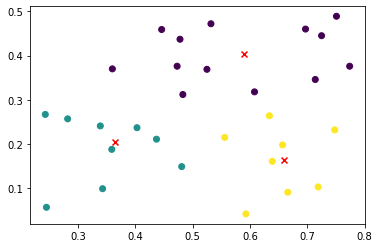

In [98]:
result=model1.predict(X,Y)
plt.scatter(X[:,0],X[:,1],c=result)
plt.scatter(model1.mu[:,0],model1.mu[:,1],marker='x',color='red');